<a href="https://colab.research.google.com/github/aviscki/AlgoritmosIA/blob/main/AlgoritmosClassIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maharshipandya/-spotify-tracks-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/-spotify-tracks-dataset


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [4]:
df = pd.read_csv("dataset.csv")  # Spotify
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


In [8]:
selected_columns = ['danceability', 'energy', 'valence', 'popularity', 'track_genre']
df = df[selected_columns]

# Remover linhas com valores faltantes
df.dropna(inplace=True)

# Separar X e y
X = df.drop('track_genre', axis=1)
y = df['track_genre']

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
models = {
    "Árvore de Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes Gaussiano": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "Acurácia": accuracy_score(y_test, y_pred),
        "Relatório": classification_report(y_test, y_pred, output_dict=True),
        "Matriz": confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name}\n")
    print("Acurácia:", results[name]["Acurácia"])
    print(classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", results[name]["Matriz"])


Árvore de Decisão

Acurácia: 0.13451754385964912
                   precision    recall  f1-score   support

         acoustic       0.06      0.06      0.06       213
         afrobeat       0.12      0.11      0.12       203
         alt-rock       0.02      0.04      0.03       215
      alternative       0.06      0.09      0.07       184
          ambient       0.12      0.13      0.13       197
            anime       0.02      0.02      0.02       193
      black-metal       0.39      0.40      0.39       210
        bluegrass       0.17      0.16      0.17       205
            blues       0.09      0.14      0.11       214
           brazil       0.03      0.04      0.03       197
        breakbeat       0.23      0.23      0.23       199
          british       0.04      0.04      0.04       214
         cantopop       0.09      0.10      0.10       193
    chicago-house       0.19      0.19      0.19       206
         children       0.21      0.17      0.19       214
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVM

Acurácia: 0.18153508771929824


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

         acoustic       0.10      0.08      0.09       213
         afrobeat       0.18      0.18      0.18       203
         alt-rock       0.17      0.00      0.01       215
      alternative       0.00      0.00      0.00       184
          ambient       0.25      0.31      0.27       197
            anime       0.10      0.04      0.06       193
      black-metal       0.42      0.52      0.47       210
        bluegrass       0.23      0.37      0.29       205
            blues       0.06      0.03      0.04       214
           brazil       0.05      0.02      0.02       197
        breakbeat       0.32      0.27      0.29       199
          british       0.00      0.00      0.00       214
         cantopop       0.10      0.21      0.14       193
    chicago-house       0.34      0.39      0.36       206
         children       0.22      0.22      0.22       214
            chill       0.12      0.22      0.16       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Naive Bayes Gaussiano

Acurácia: 0.1287280701754386


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                   precision    recall  f1-score   support

         acoustic       0.14      0.02      0.04       213
         afrobeat       0.07      0.00      0.01       203
         alt-rock       0.00      0.00      0.00       215
      alternative       0.00      0.00      0.00       184
          ambient       0.14      0.38      0.20       197
            anime       0.00      0.00      0.00       193
      black-metal       0.13      0.13      0.13       210
        bluegrass       0.20      0.20      0.20       205
            blues       0.00      0.00      0.00       214
           brazil       0.00      0.00      0.00       197
        breakbeat       0.06      0.06      0.06       199
          british       0.17      0.00      0.01       214
         cantopop       0.07      0.08      0.07       193
    chicago-house       0.08      0.40      0.13       206
         children       0.21      0.20      0.20       214
            chill       0.08      0.14      0.10       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


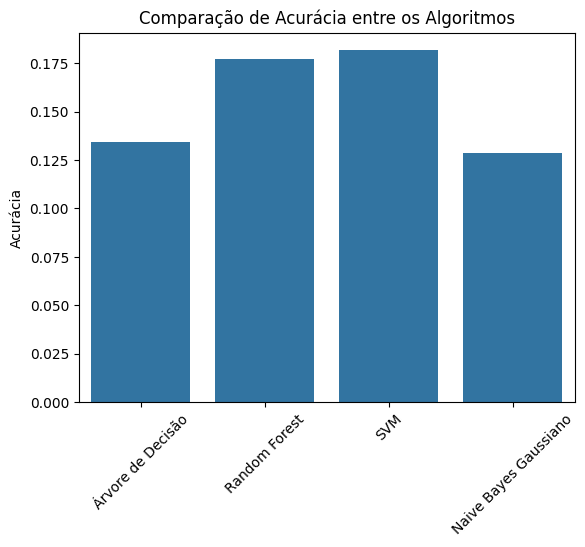

In [10]:
acuracias = {k: v["Acurácia"] for k, v in results.items()}
sns.barplot(x=list(acuracias.keys()), y=list(acuracias.values()))
plt.title("Comparação de Acurácia entre os Algoritmos")
plt.ylabel("Acurácia")
plt.xticks(rotation=45)
plt.show()